In [1]:
%matplotlib inline
import os
import glob
import numpy as np
import email

In [2]:
path = 'data/spam_data/'

In [25]:
easy_ham_paths = glob.glob(path+'easy_ham/*')
easy_ham_2_paths = glob.glob(path+'easy_ham_2/*')
hard_ham_paths = glob.glob(path+'hard_ham/*')
spam_paths = glob.glob(path+'spam/*')
spam_2_paths = glob.glob(path+'spam_2/*')
easy_ham_paths

['data/spam_data/easy_ham\\00001.7c53336b37003a9286aba55d2945844c',
 'data/spam_data/easy_ham\\00002.9c4069e25e1ef370c078db7ee85ff9ac',
 'data/spam_data/easy_ham\\00003.860e3c3cee1b42ead714c5c874fe25f7',
 'data/spam_data/easy_ham\\00004.864220c5b6930b209cc287c361c99af1',
 'data/spam_data/easy_ham\\00005.bf27cdeaf0b8c4647ecd61b1d09da613',
 'data/spam_data/easy_ham\\00006.253ea2f9a9cc36fa0b1129b04b806608',
 'data/spam_data/easy_ham\\00007.37a8af848caae585af4fe35779656d55',
 'data/spam_data/easy_ham\\00008.5891548d921601906337dcf1ed8543cb',
 'data/spam_data/easy_ham\\00009.371eca25b0169ce5cb4f71d3e07b9e2d',
 'data/spam_data/easy_ham\\00010.145d22c053c1a0c410242e46c01635b3',
 'data/spam_data/easy_ham\\00011.fbcde1b4833bdbaaf0ced723edd6e355',
 'data/spam_data/easy_ham\\00012.48a387bc38d1316a6f6b49e8c2e43a03',
 'data/spam_data/easy_ham\\00013.81c34741dbed59c6dde50777e27e7ea3',
 'data/spam_data/easy_ham\\00014.cb20e10b2bfcb8210a1c310798532a57',
 'data/spam_data/easy_ham\\00015.4d7026347ba7478

In [26]:
def get_email_content(email_path):
    file = open(email_path,encoding='latin1')
    try:
        msg = email.message_from_file(file)
        for part in msg.walk():
            if part.get_content_type() == 'text/plain':
                return part.get_payload() # prints the raw text
    except Exception as e:
        print(e)
        
        
def get_email_content_bulk(email_paths):
    email_contents = [get_email_content(o) for o in email_paths]
    return email_contents

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
ham_path = [
    easy_ham_paths,
    easy_ham_2_paths,
    hard_ham_paths
]

spam_path = [
    spam_paths,
    spam_2_paths
]

In [29]:
ham_sample = np.array([train_test_split(o) for o in ham_path])

In [30]:
ham_sample[0]

array([list(['data/spam_data/easy_ham\\00528.4069e359640cbe831b602fd3cc387469', 'data/spam_data/easy_ham\\01361.bc57ef0754c9fae5ab89cac38f656200', 'data/spam_data/easy_ham\\02040.fe93b48dcafdc2c4a30bd41682baa446', 'data/spam_data/easy_ham\\00616.1111fc61de078f069db9d72e961ab5a1', 'data/spam_data/easy_ham\\00380.9426f88747cb44438bb358841649f326', 'data/spam_data/easy_ham\\00389.8606961eaeef7b921ce1c53773248d69', 'data/spam_data/easy_ham\\01243.4288f9b90d18390df79cd4d6f95feee5', 'data/spam_data/easy_ham\\00299.7e89319a2d14ca28a61ad12fcb49eff8', 'data/spam_data/easy_ham\\00784.372fcb5f8a0507aa4a8fa0de1e76fe79', 'data/spam_data/easy_ham\\00260.9c633d54c32d46465f4162f3a91f553c', 'data/spam_data/easy_ham\\00113.6b233fa48d08abf97ff91e4548fd381d', 'data/spam_data/easy_ham\\00881.c1a373126fc964123ffbc018433b21d5', 'data/spam_data/easy_ham\\01662.4257318f87e53aa246882d00e42c67d5', 'data/spam_data/easy_ham\\01819.6fa6ec281b4b77dbe5e802748882249f', 'data/spam_data/easy_ham\\00855.8e0647984e6592b64

In [31]:
ham_train = np.array([])
ham_test = np.array([])
for o in ham_sample:
    ham_train = np.concatenate((ham_train,o[0]),axis=0)
    ham_test = np.concatenate((ham_test,o[1]),axis=0)

In [32]:
ham_train.shape, ham_test.shape

((3113,), (1040,))

In [33]:
spam_sample = np.array([train_test_split(o) for o in spam_path])

In [34]:
spam_train = np.array([])
spam_test = np.array([])
for o in spam_sample:
    spam_train = np.concatenate((spam_train,o[0]),axis=0)
    spam_test = np.concatenate((spam_test,o[1]),axis=0)

In [35]:
spam_train.shape, spam_test.shape

((1422,), (476,))

In [36]:
ham_train_label = [0]*ham_train.shape[0]
spam_train_label = [1]*spam_train.shape[0]
x_train = np.concatenate((ham_train,spam_train))
y_train = np.concatenate((ham_train_label,spam_train_label))

In [37]:
ham_test_label = [0]*ham_test.shape[0]
spam_test_label = [1]*spam_test.shape[0]
x_test = np.concatenate((ham_test,spam_test))
y_test = np.concatenate((ham_test_label,spam_test_label))

In [38]:
train_shuffle_index = np.random.permutation(np.arange(0,x_train.shape[0]))
test_shuffle_index = np.random.permutation(np.arange(0,x_test.shape[0]))

In [39]:
x_train = x_train[train_shuffle_index]
y_train = y_train[train_shuffle_index]

In [40]:
x_test = x_test[test_shuffle_index]
y_test = y_test[test_shuffle_index]

In [41]:
x_train = get_email_content_bulk(x_train)
x_test = get_email_content_bulk(x_test)

In [42]:
def remove_null(datas,labels):
    not_null_idx = [i for i,o in enumerate(datas) if o is not None]
    return np.array(datas)[not_null_idx],np.array(labels)[not_null_idx]

In [43]:
x_train,y_train = remove_null(x_train,y_train)
x_test,y_test = remove_null(x_test,y_test)

In [44]:
x_train[10]

'\nForwarded-by: Nev Dull <nev@sleepycat.com>\nForwarded-by: newsletter@tvspy.com\nExcerpted: ShopTalk - September 13, 2002\n\n"I\'m a tad furry, so animal rights issues come into play."\n\tRobin Williams, telling Entertainment Weekly why he won\'t do\n\tnude scenes in movies.\n\n=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=\nJohnny U: Johnny Unitas was the National Football League\'s most valuable\nplayer twice - and he led Baltimore to victory in "Super Bowl Five."\nFor those of you younger than 30: this WAS modern football.  The game\nwas played on artificial turf. (Richard Burkard/\nhttp://www.Laughline.com)\n\nAnnouncement: How telling is it that the death of Johnny Unitas was\nannounced by the Baltimore Ravens - and not the Colts, who now play in\nIndianapolis?  When the Colt owners moved out of Baltimore years ago,\nthey apparently left all the history books behind. (Burkard)\n\nDick Disappears: Vice President Dick Cheney remains at an undisclosed\nlocation.  The move is for

In [45]:
import re
import string
from nltk.tokenize import word_tokenize

In [46]:
def remove_hyperlink(word):
    return  re.sub(r"http\S+", "", word)
def to_lower(word):
    result = word.lower()
    return result
def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result
def remove_punctuation(word):
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result
def remove_whitespace(word):
    result = word.strip()
    return result
def replace_newline(word):
    return word.replace('\n','')

In [47]:
def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_punctuation,remove_whitespace]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

In [48]:
x_train = [clean_up_pipeline(o) for o in x_train]
x_test = [clean_up_pipeline(o) for o in x_test]

In [49]:
x_train[10]

'forwardedby nev dull nevsleepycatcomforwardedby newslettertvspycomexcerpted shoptalk  september  im a tad furry so animal rights issues come into play\trobin williams telling entertainment weekly why he wont do\tnude scenes in moviesjohnny u johnny unitas was the national football leagues most valuableplayer twice  and he led baltimore to victory in super bowl fivefor those of you younger than  this was modern football  the gamewas played on artificial turf richard burkardannouncement how telling is it that the death of johnny unitas wasannounced by the baltimore ravens  and not the colts who now play inindianapolis  when the colt owners moved out of baltimore years agothey apparently left all the history books behind burkarddick disappears vice president dick cheney remains at an undisclosedlocation  the move is for security reasons  the bush administrationis trying to keep him at a safe distance from wouldbe subpoenas alanray  noelle nabbed jeb bushs daughter noelle is in trouble wi

In [50]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [51]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NewUser\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NewUser\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [53]:
# Tokenization are taking slightly longer to process

x_train = [word_tokenize(o) for o in x_train]
x_test = [word_tokenize(o) for o in x_test]

In [54]:
x_train[0]


['from',
 'harlan',
 'feinstein',
 'harlanfeinsteinsnet',
 'date',
 'sat',
 'aug',
 'exmh',
 'keeps',
 'turning',
 'the',
 'folder',
 'indicator',
 'blue',
 'for',
 'one',
 'folder',
 'and',
 'ive',
 'read',
 'all',
 'the',
 'messages',
 'in',
 'the',
 'folder',
 'driving',
 'me',
 'nuts',
 'ive',
 'packed',
 'the',
 'folder',
 'ive',
 'deleted',
 'the',
 'mhsequences',
 'file',
 'there',
 'keeps',
 'doing',
 'it',
 'help',
 'ive',
 'just',
 'recently',
 'started',
 'using',
 'was',
 'using',
 'so',
 'perhaps',
 'there',
 'are',
 'things',
 'that',
 'needed',
 'to',
 'be',
 'deletedchanged',
 'in',
 'my',
 'settings',
 'has',
 'been',
 'out',
 'for',
 'over',
 'a',
 'yeari',
 'cant',
 'think',
 'of',
 'anything',
 'with',
 'those',
 'symptoms',
 'in',
 'but',
 'why',
 'dont',
 'you',
 'try',
 'the',
 'upgrade',
 'and',
 'see',
 'if',
 'you',
 'still',
 'have',
 'the',
 'problemchris',
 'chris',
 'garrigues',
 'vircio',
 'congress',
 'suite',
 'austin',
 'tx',
 'world',
 'war',
 'iii',


In [55]:
def remove_stop_words(words):
    result = [i for i in words if i not in ENGLISH_STOP_WORDS]
    return result
def word_stemmer(words):
    return [stemmer.stem(o) for o in words]
def word_lemmatizer(words):
    return [lemmatizer.lemmatize(o) for o in words]

In [56]:
def clean_token_pipeline(words):
    cleaning_utils = [remove_stop_words,word_lemmatizer]
    for o in cleaning_utils:
        words = o(words)
    return words

In [57]:
x_train = [clean_token_pipeline(o) for o in x_train]
x_test = [clean_token_pipeline(o) for o in x_test]

In [58]:
x_train[0]

['harlan',
 'feinstein',
 'harlanfeinsteinsnet',
 'date',
 'sat',
 'aug',
 'exmh',
 'keep',
 'turning',
 'folder',
 'indicator',
 'blue',
 'folder',
 'ive',
 'read',
 'message',
 'folder',
 'driving',
 'nut',
 'ive',
 'packed',
 'folder',
 'ive',
 'deleted',
 'mhsequences',
 'file',
 'keep',
 'doing',
 'help',
 'ive',
 'just',
 'recently',
 'started',
 'using',
 'using',
 'thing',
 'needed',
 'deletedchanged',
 'setting',
 'yeari',
 'think',
 'symptom',
 'dont',
 'try',
 'upgrade',
 'problemchris',
 'chris',
 'garrigues',
 'vircio',
 'congress',
 'suite',
 'austin',
 'tx',
 'world',
 'war',
 'iii',
 'wrongdoer',
 'v',
 'evildoer']

In [59]:
x_train = [" ".join(o) for o in x_train]
x_test = [" ".join(o) for o in x_test]

In [60]:
x_train[0]

'harlan feinstein harlanfeinsteinsnet date sat aug exmh keep turning folder indicator blue folder ive read message folder driving nut ive packed folder ive deleted mhsequences file keep doing help ive just recently started using using thing needed deletedchanged setting yeari think symptom dont try upgrade problemchris chris garrigues vircio congress suite austin tx world war iii wrongdoer v evildoer'

In [61]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [62]:
#python -m pip install wordcloud

In [63]:
import sys
print(sys.executable)

C:\Users\NewUser\Anaconda3\python.exe


In [64]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [65]:
spam_train_index = [i for i,o in enumerate(y_train) if o == 1]
non_spam_train_index = [i for i,o in enumerate(y_train) if o == 0]

In [66]:
spam_email = np.array(x_train)[spam_train_index]
non_spam_email = np.array(x_train)[non_spam_train_index]

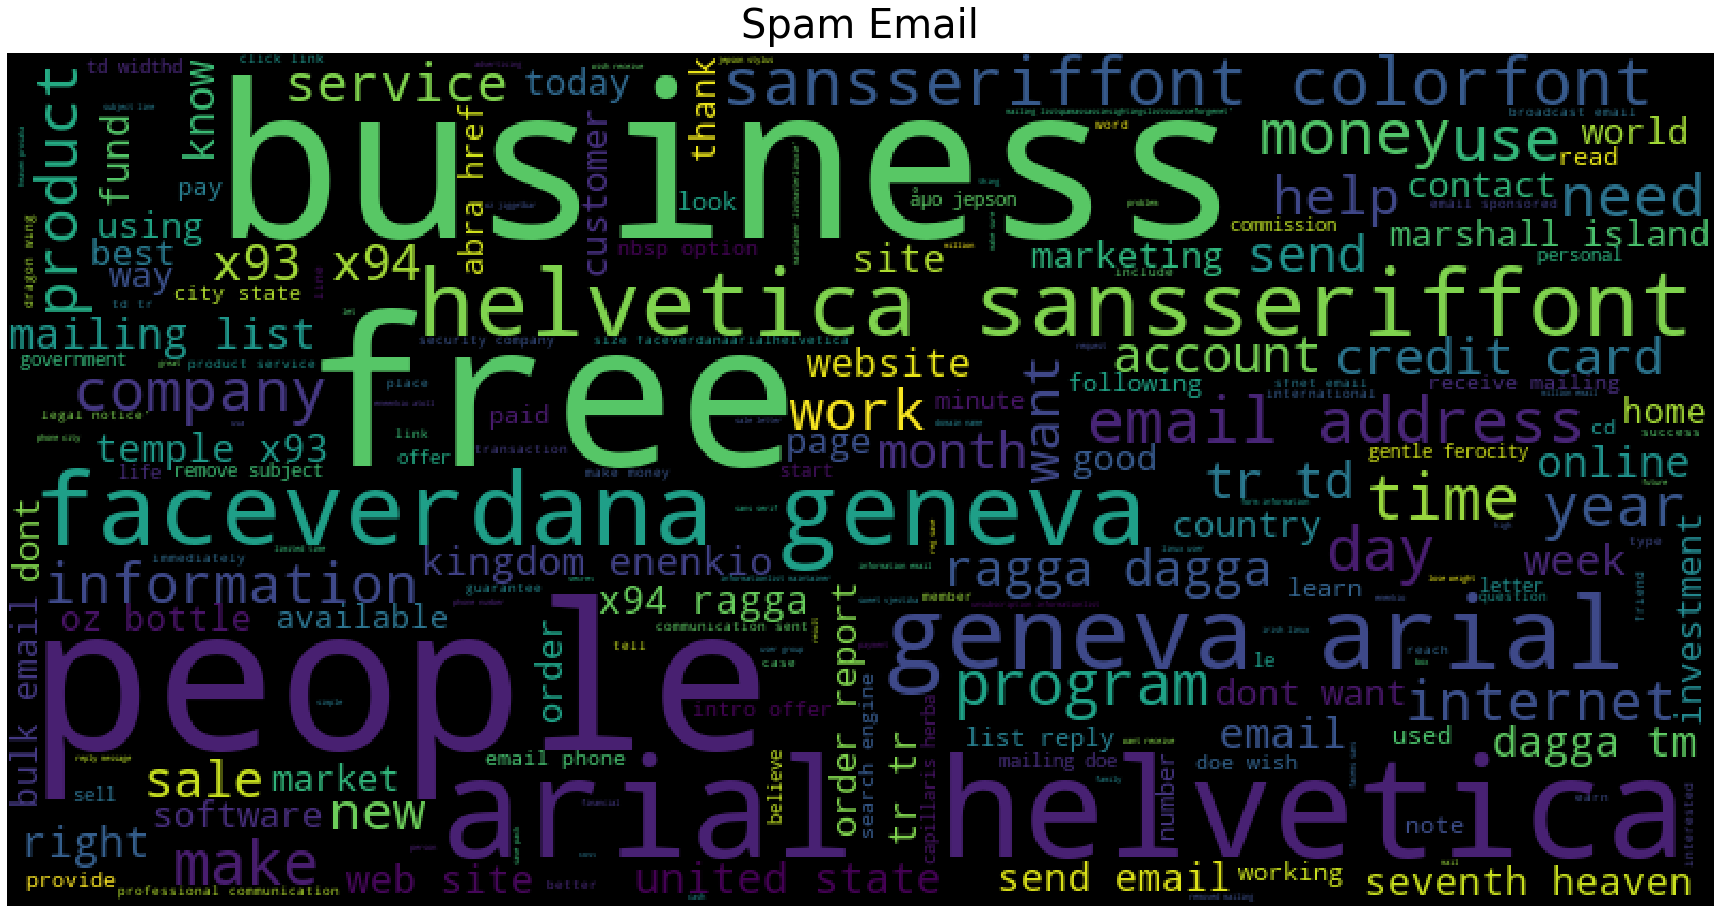

In [67]:
plot_wordcloud(spam_email,title = 'Spam Email')

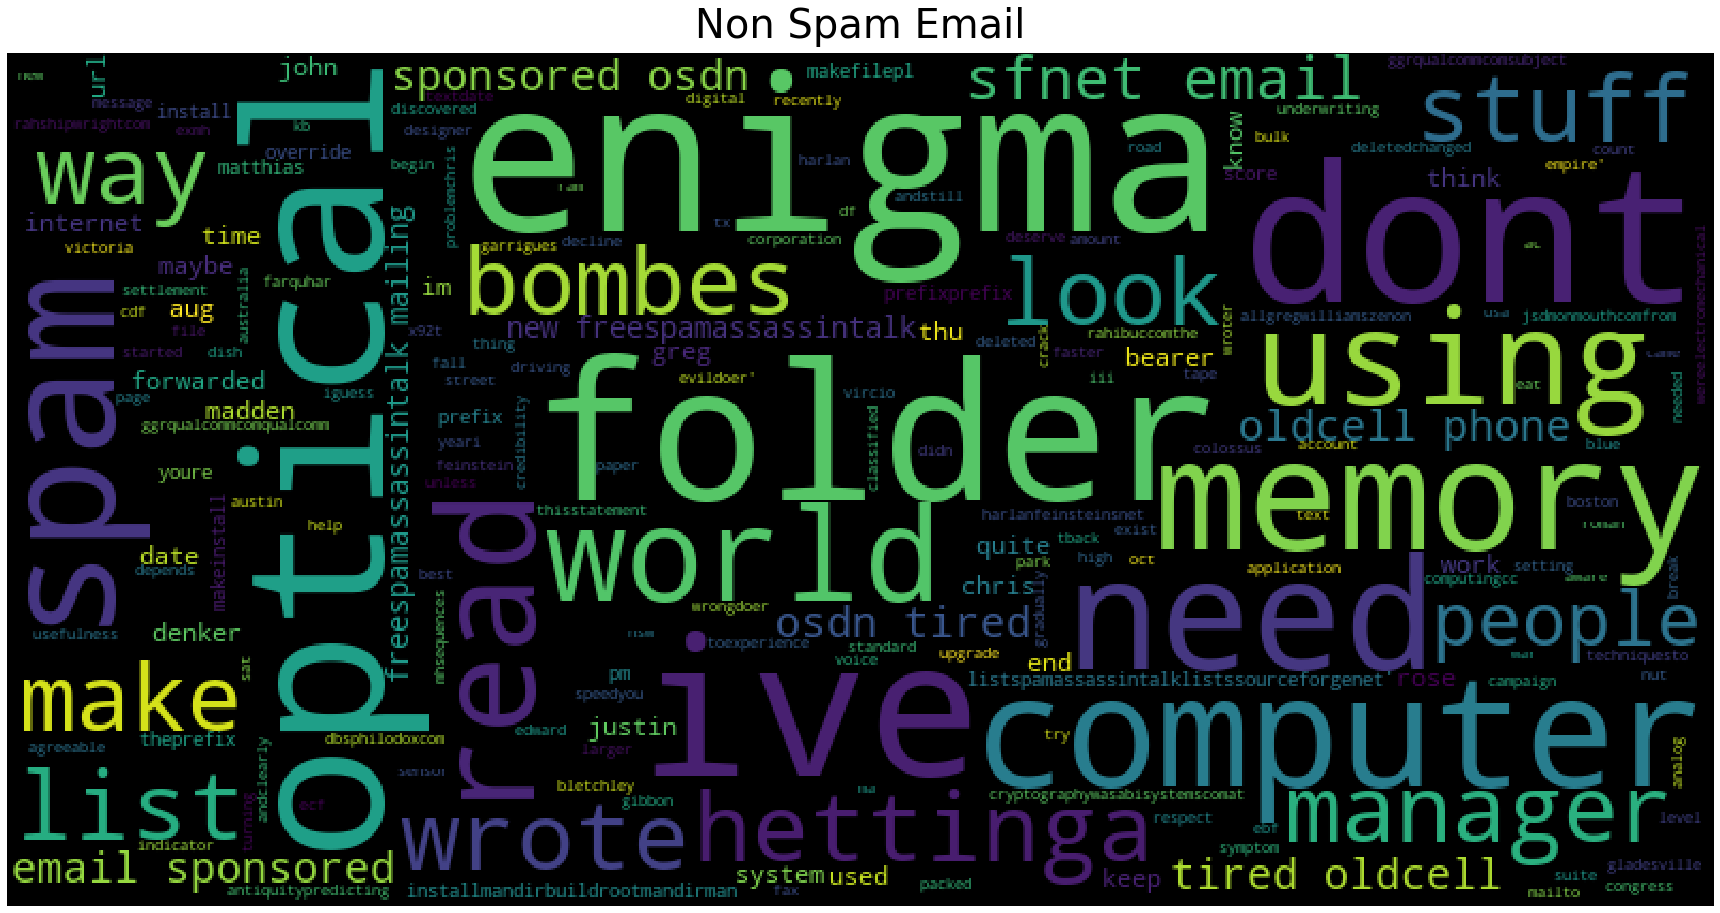

In [68]:
plot_wordcloud(non_spam_email,title="Non Spam Email")

In [72]:
x_train = [o.split(" ") for o in x_train]
x_test = [o.split(" ") for o in x_test]
x_train[0]

['harlan',
 'feinstein',
 'harlanfeinsteinsnet',
 'date',
 'sat',
 'aug',
 'exmh',
 'keep',
 'turning',
 'folder',
 'indicator',
 'blue',
 'folder',
 'ive',
 'read',
 'message',
 'folder',
 'driving',
 'nut',
 'ive',
 'packed',
 'folder',
 'ive',
 'deleted',
 'mhsequences',
 'file',
 'keep',
 'doing',
 'help',
 'ive',
 'just',
 'recently',
 'started',
 'using',
 'using',
 'thing',
 'needed',
 'deletedchanged',
 'setting',
 'yeari',
 'think',
 'symptom',
 'dont',
 'try',
 'upgrade',
 'problemchris',
 'chris',
 'garrigues',
 'vircio',
 'congress',
 'suite',
 'austin',
 'tx',
 'world',
 'war',
 'iii',
 'wrongdoer',
 'v',
 'evildoer']

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [75]:
vectorizer = TfidfVectorizer()
raw_sentences = [' '.join(o) for o in x_train]
vectorizer.fit(raw_sentences)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [76]:
def convert_to_feature(raw_tokenize_data):
    raw_sentences = [' '.join(o) for o in raw_tokenize_data]
    return vectorizer.transform(raw_sentences)

In [82]:
x_train_features = convert_to_feature(x_train)
x_test_features = convert_to_feature(x_test)
vectorizer.vocabulary_

{'harlan': 37467,
 'feinstein': 32120,
 'harlanfeinsteinsnet': 37468,
 'date': 20854,
 'sat': 66033,
 'aug': 7148,
 'exmh': 29821,
 'keep': 44683,
 'turning': 78699,
 'folder': 33354,
 'indicator': 41084,
 'blue': 11199,
 'ive': 43663,
 'read': 62642,
 'message': 49844,
 'driving': 25341,
 'nut': 54402,
 'packed': 57318,
 'deleted': 22647,
 'mhsequences': 50101,
 'file': 32616,
 'doing': 24747,
 'help': 38097,
 'just': 44436,
 'recently': 62941,
 'started': 71080,
 'using': 80234,
 'thing': 75916,
 'needed': 52715,
 'deletedchanged': 22649,
 'setting': 67511,
 'yeari': 84986,
 'think': 75971,
 'symptom': 72921,
 'dont': 24924,
 'try': 78548,
 'upgrade': 79839,
 'problemchris': 60691,
 'chris': 16506,
 'garrigues': 35245,
 'vircio': 81304,
 'congress': 18501,
 'suite': 72307,
 'austin': 7188,
 'tx': 78845,
 'world': 84037,
 'war': 81771,
 'iii': 40268,
 'wrongdoer': 84314,
 'evildoer': 29542,
 'unbelievable': 79116,
 'price': 60464,
 'cell': 15506,
 'phone': 58743,
 'accessorieshands': 

In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [84]:
clf = GaussianNB()

In [85]:
clf.fit(x_train_features.toarray(),y_train)

GaussianNB(priors=None)

In [86]:
clf.fit(x_train_features.toarray(),y_train)

GaussianNB(priors=None)

In [87]:
clf.score(x_test_features.toarray(),y_test)

0.9257503949447078

In [89]:
clf.score(x_train_features.toarray(),y_train)

0.9984251968503937